In [109]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [110]:
import numpy as np
import pandas as pd

In [111]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [112]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [113]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [114]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [115]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [116]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [117]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [118]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [136]:

# Get the last date of entry
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date = str(last_date)[2:-3]
print(last_date)

# Get the date a year from the last date.
first_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(first_date)

2017-08-23
2016-08-23


In [137]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

year_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > first_date).\
                        order_by(Measurement.date).all()
#print(one_yr_prcp)
# Save the query results as a Pandas DataFrame and set the index to the date column  
year_prcp_df = pd.DataFrame(data=year_prcp)
year_prcp_df.set_index("date", inplace=True)

year_prcp_df.rename(columns={"prcp": "precipitation"}, inplace=True)
year_prcp_df

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


<Figure size 720x4320 with 0 Axes>

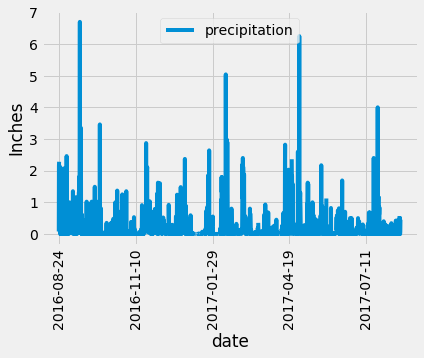

In [160]:
# Calculate the date 1 year ago from the last data point in the database
#year_prcp.set_index('date').Open.plot()
#year_prcp_df.set_index('date',inplace=True)
plt.figure(figsize=(10,60))
year_prcp_df = year_prcp_df.sort_index()
ax = year_prcp_df.plot(rot=90)
plt.ylabel("Inches")
plt.legend()
#plt.xticks(rotation=90)

plt.show()

In [128]:
year_prcp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [129]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(func.count(Station.station))
station_count = stations[0]
print("There are {} stations available.".format(station_count[0]))

There are 9 stations available.


In [130]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
observations = session.query(Measurement.station, func.count(Measurement.tobs))\
             .group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())

for station in observations:

    print(station)
    




print("Most active station is {}.".format(observations[0][0]))

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)
Most active station is USC00519281.


In [131]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = observations[0][0]

stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == most_active)
                      
stats_list=list(stats)
print(stats_list)

[(54.0, 85.0, 71.66378066378067)]


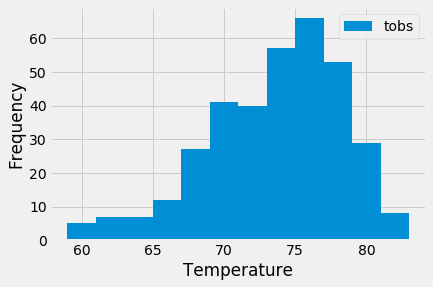

In [132]:
tobs = session.query(Measurement.tobs).filter(Measurement.date >= year_from_current)\
.filter(Measurement.date <= most_current_date).filter(Measurement.station == top_station)

tobs_list = []
for tob in tobs:
    tobs_list.append(tob[0])
    
fig = plt.figure()
plt.hist(tobs_list, bins=12,label='tobs')
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend()
plt.show()

## Bonus Challenge Assignment

In [162]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-08-23', '2017-08-23'))

[(58.0, 74.59058295964125, 87.0)]


In [165]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#setting the start and end dates of the trip
start_date = dt.datetime(2017,6,3) 
end_date = dt.datetime(2017,6,18) 

calc_temp = session.query(func.avg(Measurement.tobs),func.max(Measurement.tobs),func.min(Measurement.tobs)).\
    filter(Measurement.date > start_date).filter(Measurement.date < end_date).statement


#take query and put it into a dataframe
temps = pd.read_sql_query(calc_temp, session.bind)
temps


,avg_1,max_1,min_1
0,77.214286,83.0,72.0


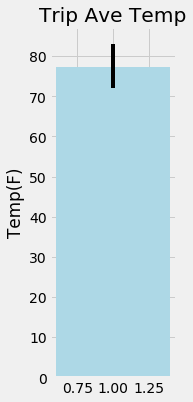

In [179]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

avg = temps['avg_1']
temp_max = temps['max_1']
temp_min = temps['min_1']
 
x = np.arange(1,2)

plt.figure(figsize=(2,6))
plt.bar(x,avg,color="lightblue",yerr=(avg-temp_min,temp_max-avg))

plt.title("Trip Ave Temp")

plt.ylabel("Temp(F)")

plt.show()


In [174]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

#query calculates the total amount of rainfall from each station
vacation_query = engine.execute('SELECT measurement.station, name, latitude, longitude, elevation, COUNT(prcp) FROM measurement \
INNER JOIN station ON measurement.station = station.station \
WHERE date BETWEEN "2017-06-03" AND "2017-06-18" GROUP BY measurement.station ORDER BY COUNT(prcp) DESC').fetchall()
vacation_query

[('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 16),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 16),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 16),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 16),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 16),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 13),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0)]